# Regression
---

Classification problems are whose target variables are cateogrical (binary/multiclass). When the target variable is a continuous variable, the problem is now a **regression** problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this notebook, we will work with the Boston housing data.

In [3]:
housing_df = pd.read_csv("assets/data/boston.csv")
housing_df

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


`MEDV` is the target variable and it represents the median value of owner occupied homes in thousands of dollars.

We now can create feature and target arrays.

In [28]:
X = housing_df.drop(columns=["MEDV"]).values
y = housing_df.MEDV.values

One of the most known regression models is the `LinearRegression` which builds a linear (polynomial of all features of degree 1) hypothesis i.e., fits a straight line.

In [5]:
from sklearn.linear_model import LinearRegression

Let's try to fit only one feature to the model, for example the average number of rooms `RM`.

In [6]:
X_rooms = X[:, 5] # RM is in column-index 5.

Text(0, 0.5, 'Value of House')

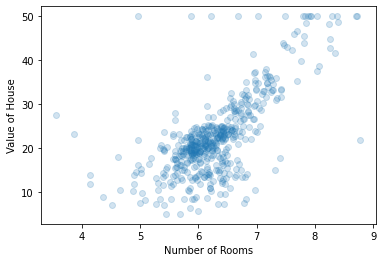

In [8]:
plt.figure()
plt.scatter(X_rooms, y, alpha=0.2)
plt.xlabel("Number of Rooms")
plt.ylabel("Value of House")

In [9]:
rooms_reg = LinearRegression()
rooms_reg.fit(X_rooms, y)

ValueError: Expected 2D array, got 1D array instead:
array=[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.854 6.101 7.929 5.877
 6.319 6.402 5.875 5.88  5.572 6.416 5.859 6.546 6.02  6.315 6.86  6.98
 7.765 6.144 7.155 6.563 5.604 6.153 7.831 6.782 6.556 7.185 6.951 6.739
 7.178 6.8   6.604 7.875 7.287 7.107 7.274 6.975 7.135 6.162 7.61  7.853
 8.034 5.891 6.326 5.783 6.064 5.344 5.96  5.404 5.807 6.375 5.412 6.182
 5.888 6.642 5.951 6.373 6.951 6.164 6.879 6.618 8.266 8.725 8.04  7.163
 7.686 6.552 5.981 7.412 8.337 8.247 6.726 6.086 6.631 7.358 6.481 6.606
 6.897 6.095 6.358 6.393 5.593 5.605 6.108 6.226 6.433 6.718 6.487 6.438
 6.957 8.259 6.108 5.876 7.454 8.704 7.333 6.842 7.203 7.52  8.398 7.327
 7.206 5.56  7.014 8.297 7.47  5.92  5.856 6.24  6.538 7.691 6.758 6.854
 7.267 6.826 6.482 6.812 7.82  6.968 7.645 7.923 7.088 6.453 6.23  6.209
 6.315 6.565 6.861 7.148 6.63  6.127 6.009 6.678 6.549 5.79  6.345 7.041
 6.871 6.59  6.495 6.982 7.236 6.616 7.42  6.849 6.635 5.972 4.973 6.122
 6.023 6.266 6.567 5.705 5.914 5.782 6.382 6.113 6.426 6.376 6.041 5.708
 6.415 6.431 6.312 6.083 5.868 6.333 6.144 5.706 6.031 6.316 6.31  6.037
 5.869 5.895 6.059 5.985 5.968 7.241 6.54  6.696 6.874 6.014 5.898 6.516
 6.635 6.939 6.49  6.579 5.884 6.728 5.663 5.936 6.212 6.395 6.127 6.112
 6.398 6.251 5.362 5.803 8.78  3.561 4.963 3.863 4.97  6.683 7.016 6.216
 5.875 4.906 4.138 7.313 6.649 6.794 6.38  6.223 6.968 6.545 5.536 5.52
 4.368 5.277 4.652 5.    4.88  5.39  5.713 6.051 5.036 6.193 5.887 6.471
 6.405 5.747 5.453 5.852 5.987 6.343 6.404 5.349 5.531 5.683 4.138 5.608
 5.617 6.852 5.757 6.657 4.628 5.155 4.519 6.434 6.782 5.304 5.957 6.824
 6.411 6.006 5.648 6.103 5.565 5.896 5.837 6.202 6.193 6.38  6.348 6.833
 6.425 6.436 6.208 6.629 6.461 6.152 5.935 5.627 5.818 6.406 6.219 6.485
 5.854 6.459 6.341 6.251 6.185 6.417 6.749 6.655 6.297 7.393 6.728 6.525
 5.976 5.936 6.301 6.081 6.701 6.376 6.317 6.513 6.209 5.759 5.952 6.003
 5.926 5.713 6.167 6.229 6.437 6.98  5.427 6.162 6.484 5.304 6.185 6.229
 6.242 6.75  7.061 5.762 5.871 6.312 6.114 5.905 5.454 5.414 5.093 5.983
 5.983 5.707 5.926 5.67  5.39  5.794 6.019 5.569 6.027 6.593 6.12  6.976
 6.794 6.03 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

There's a shape issue with `X_rooms` and `y`.

In [10]:
X_rooms.shape, y.shape

((506,), (506,))

Ah, the shape only has shape of one index, we should add the column index.

In [11]:
X_rooms = X_rooms.reshape(-1, 1) # -1 will be mapped to the number required to be a valid shape
y = y.reshape(-1, 1)

In [12]:
rooms_reg.fit(X_rooms, y)

LinearRegression()

Let's look at the line fitted between `X_rooms` and `y`.

Text(0, 0.5, 'Value of House')

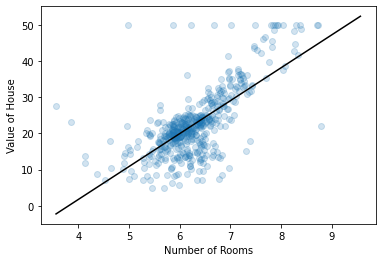

In [13]:
rooms_space = np.arange(X_rooms.min(), X_rooms.max()+1, 1)
predictions = rooms_reg.predict(rooms_space.reshape(-1, 1))

plt.figure()
plt.scatter(X_rooms, y, alpha=0.2)
plt.plot(rooms_space, predictions, color="black")
plt.xlabel("Number of Rooms")
plt.ylabel("Value of House")

Let's do the same for the dataset stored in `gapminder.csv`.

In [14]:
gapminder_df = pd.read_csv("assets/data/gapminder.csv")
gapminder_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [16]:
features_df = gapminder_df.drop(columns=['life'])
target_df = gapminder_df.life

Let's look for the coorelation between the features. We have done this using `scatter_matrix` function from `pandas` like this.

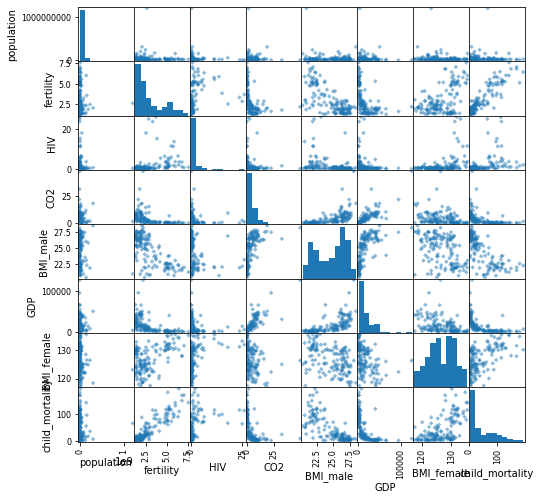

In [19]:
pd.plotting.scatter_matrix(
    features_df,
    figsize = [8, 8],
    s = 10, # this tells the size of the points
    marker = 'D' # this tells to make the marker shape as diamonds
);

# we have discarded the color for each class of the target because it's continuous now


We can see some correlation, to have a precise number represents the coorelation between each pair of features, we can visualize the heatmap of the correlation of the dataframe `features_df.corr()`. For the heatmap, we can use `heatmap` function from `seaborn`.

For heat maps with a middle value (here for correlation it's 0), we should use [diverging color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html#diverging).

<AxesSubplot:>

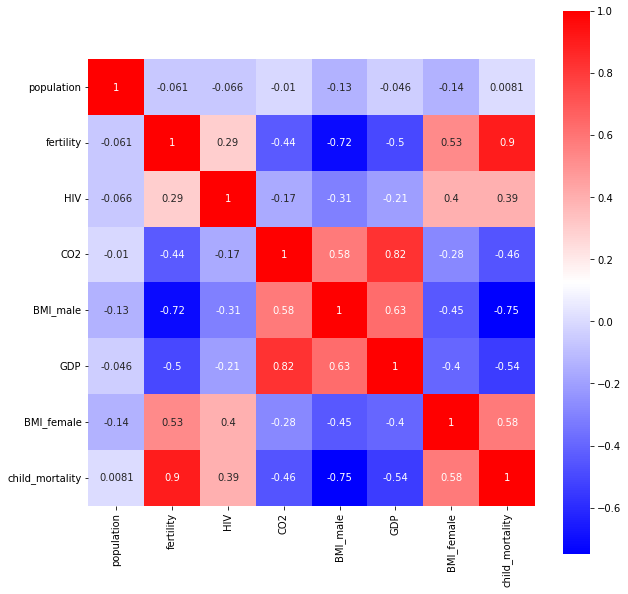

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    data = features_df.corr(),
    annot = True,
    cmap = "bwr",
    square = True
)

I know I said we should check the correlations between features, but let's investigate those with `life` added.

<AxesSubplot:>

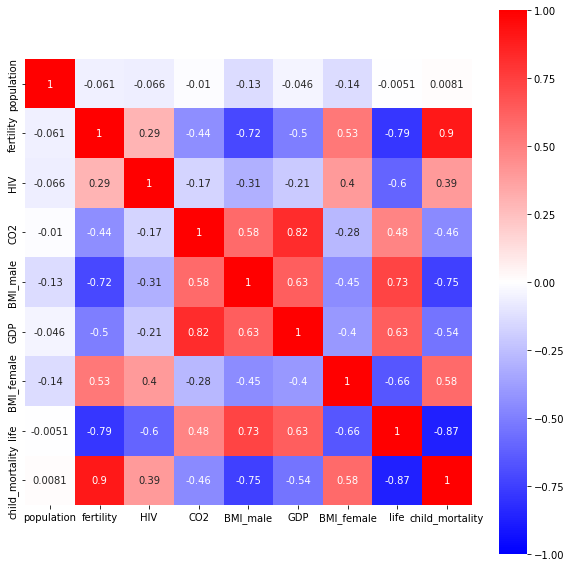

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    data = gapminder_df.corr(),
    annot = True,
    cmap = "bwr",
    square = True,
    vmin = -1,
    vmax = 1
)

## How does linear regression works?

We want to fit a line to the data and target in this form.

$$
y = ax + b
$$

where $y$ is the target, $x$ is a single feature, and $a$ and $b$ are the **parameters of the model**. So the target of linear regression is to find $a$ and $b$.

To achieve this purpose, the linear regression has an error function called the *cost function* and it tries to find the line (model) whose parameters i.e., $a$ and $b$ **minimizes** that cost function.

For the linear regression algorithm, we wish to minimize the vertical distance between the ture and predicted value for each sample point.

![](assets/images/residuals.png)

These distances are called **residulas**. The cost function is the average sum of the squares of residuals. That's why linear regression is also known as OLS (ordinary least squares).

For 2 features, our equation will be,

$$
y = a_1 * x_1 + a_2 * x_2 + b
$$

To fit a linear regression to 2 features, the model tries to figure out 3 variables (parameters) $a_1, a_2, b$.

For $n$ features, our equation will be,

$$
y = a_1 * x_1 + a_2 * x_2 + \cdots + a_n * x_n + b
$$

So our model tries to figure out a parameter $a_i$ for each feature $x_i$ for $i = 1, 2, \cdots, n$ where $n$ is the number of features `X.shape[1]` in addition to the parameter $b$.

## Linear regression for all features.

Let's fit the linear regression model to all features of a training part of the boston housing dataset.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
boston_reg_all = LinearRegression()

In [33]:
boston_reg_all.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = boston_reg_all.predict(X_test)

Like we had accuracy for classification problems, we have [$R^2$](https://statisticsbyjim.com/regression/interpret-r-squared-regression/) for regression problems. 

TL;DR
R-squared ($R^2$) measure the correlation between the predicted values and the actual values. The closer to 1 (range [-1, 1]), the better. We can calculate the $R^2$ from the `score` method of the regressor.

In [35]:
boston_reg_all.score(X_test, y_test)

0.7112260057484896

## Cross Vlaidation

The way is $R^2$ is calculated depends on the `X_test` and `y_test` so it depends on the splitting range. For different test sets, we will get different r2 (I will write it this way from now on :) ).

For that we uses a technique called ***cross-validation***. It is based on splitting the whole data into **folds**. One is kept away for testing and the other folds are used for training.

Using the test fold and the predictions generated from the model fitted to the other folds of data, we calculate our metric (r2) for the first time. We do the same until all folds of data have been used for testing and a number of metrics equals to the number of the folds is calculated.

![](assets/images/k-fold-cv.png)

If we are going to split the dataset into 5 folds, the process will be called 5-fold cross-validation (CV). If we used 10 folds, it will be called 10-fold CV. Generally it is called k-fold CV. 


To perform k-fold CV, we import the `cross_val_score` from `sklearn.model_selection`

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
reg = LinearRegression()

Now, we pass the model to the `cross_val_score` with the features `X` and the targets `y` along with the number of folds using `cv` argument.

In [38]:
cv_results = cross_val_score(reg, X, y, cv=5)

Note that the `cv_results` contains 5 values each represent the r2 between the true values (the test fold at iteration i/5) and the predictions (generated from the model fitted into the other folds). The r2 is the default score for the linear regression model.

In [39]:
cv_results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [40]:
cv_results.mean()

0.3532759243958771

It dropped from 0.71 to 0.35. The model needs more work to be generalized. We couldn't catch that without cross-validation.

## Regularized Regression

In linear regression, the model assigns a parameter for each feature to try to minimize the cost function. In a high-dimensional dataset (with a lot of features), these parameters (coefficients) can be very large and this leads to overfitting.

For that, we need to alter the cost function so that it penalizes for selecting large cofficients. This is called **regularization**. There are 2 types of regularized regression:

First we have ***Ridge Regression*** : where is the cost function is OLS cost function plus $\boxed{\alpha * \sum_{i=1}^{n}a_i^2}$. Here the model tries to minimize the cost function but not only taking into consideration the residuals but also penalizing large-magnitude (+ve or -ve) cofficients.

$\alpha$ here is a hyperparameter that we set before training. Picking $\alpha$ is the same for picking $k$ in KNN model. This is called hyperparameter tuning. We can think of $\alpha$ as measurement of complexity of the regularization where

* setting $\alpha = 0$ will make the cost function only the OLS part which may lead to overfitting.
* setting $\alpha$ to very high value can lead to underfitting.

To use ridge regularized model, we can import `Ridge` from `sklearn.linear_model`.

In [41]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, normalize=True) # normalize tells the ridge_reg to make all features in the same scale

ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.6996938275127313

Another type of regularized regression is the ***lasso regression*** where its cost function is the standard OLS cost function plus $\boxed{\alpha * \sum_{i=1}^{n}|a_i|}$.

In [45]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, normalize=True)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.5950229535328548

In lasso regression, the model tends to shrink the less important features to exactly 0. That's why we can use lasso regression for feature selection by fitting the data and select features whose cofficients are not 0 as they are considered by the lasso regressor to be more important that the other.

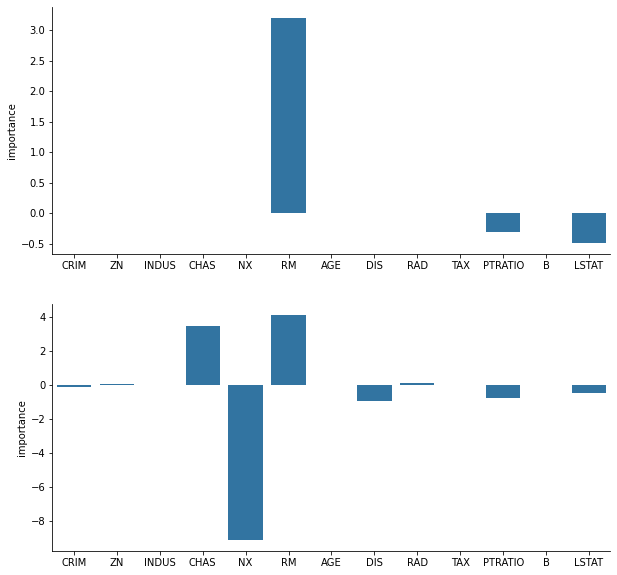

In [75]:
features_names = housing_df.drop(columns=['MEDV']).columns

lasso_feature_importances = pd.DataFrame(list(lasso_reg.coef_), index=features_names, columns=['importance'])
fig, ax = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.barplot(
    data = lasso_feature_importances,
    x = lasso_feature_importances.index,
    y = "importance",
    color = sns.color_palette()[0],
    ax = ax[0]
)

ridge_feature_importances = pd.DataFrame(list(ridge_reg.coef_), index=features_names, columns=['importance'])
sns.barplot(
    data = ridge_feature_importances,
    x = ridge_feature_importances.index,
    y = "importance",
    color = sns.color_palette()[0],
    ax = ax[1]
)


sns.despine()

Here, we can see that 3 features aren't discarded by the lasso regressor unlike the ridge regressor. These 3 features should be the most important predictors in our regression task.

Lasso is great for feature selection but when building regression models, ridge regression should be your first choice.

Let's apply a hyperparameter tuning for the parameter $\alpha$ of the Ridge regression. Let's use the `gapminder` data.

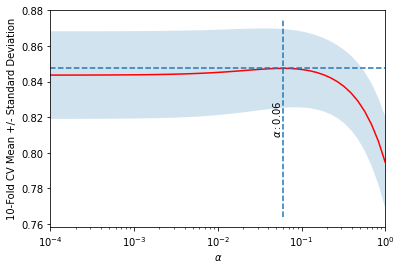

In [133]:
df = pd.read_csv('assets/data/gapminder.csv')

df_columns = df.drop(['life', 'Region'], axis = 1).columns
X = df.drop(['life', 'Region'], axis = 1).values
y = df['life'].values

alpha_space = np.logspace(-4, 0, 50)
ridge_scores_mean = []
ridge_scores_std = []

ridge_reg = Ridge(normalize=True)

for alpha in alpha_space:
    ridge_reg.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge_reg, X, y, cv=10)
    ridge_scores_mean.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

    
ridge_scores_mean = np.array(ridge_scores_mean)
std_err = np.array(ridge_scores_std) / np.sqrt(10)

# plt.figure(figsize=(10, 10))
plt.fill_between(
    x = alpha_space,
    y1 = ridge_scores_mean - std_err,
    y2 = ridge_scores_mean + std_err,
    alpha = 0.2
)
plt.plot(alpha_space, ridge_scores_mean, color = "red")
plt.axhline(np.max(ridge_scores_mean), linestyle = "--")
plt.vlines(x = alpha_space[np.argmax(ridge_scores_mean)], ymin=plt.ylim()[0], ymax=plt.ylim()[1], linestyles="--")

xy = (alpha_space[np.argmax(ridge_scores_mean)], (plt.ylim()[0] + plt.ylim()[1]) / 2)
plt.annotate(f"$\\alpha: {round(xy[0], 3)}$", xy=xy, rotation=90, va="center", ha="right")

plt.xscale('log')
plt.xlim(alpha_space[0], alpha_space[-1])
plt.xlabel("$\\alpha$")
plt.ylabel("10-Fold CV Mean +/- Standard Deviation");
plt.savefig("fig.jpg", dpi=3000)